In [ ]:
#Show installed gpu
!nvidia-smi

Sat Feb  1 19:39:57 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [1]:
#Mount Google Drive 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#import modules
import numpy as np
import cv2
import os
import csv
import keras
from keras import optimizers
from keras.utils import np_utils, generic_utils
from keras.models import Sequential,Model
from keras.layers import Dropout, Flatten, Dense,Input
from keras.applications.resnet50 import ResNet50
from keras.applications.imagenet_utils import preprocess_input
from keras import backend as K
from keras.layers.core import Lambda
from sklearn.preprocessing import normalize
from keras.preprocessing.image import ImageDataGenerator
from keras.initializers import RandomNormal
import random

import numpy.linalg as la
from IPython import embed
shapex=(480,640,3) #config the shape of the images to be imported to the network

Using TensorFlow backend.


In [ ]:
#Loading the dataset images from google drive
path='drive/My Drive/traffic' # the path to the training directory in the drive
train=np.zeros((154,shapex[0],shapex[1],3),dtype=np.uint8) #creating blank dataset matrix
train_classes=np.array([]) #creating blank dataset classes
test=np.zeros((34,shapex[0],shapex[1],3),dtype=np.uint8) #creating blank test dataset matrix
test_classes=np.array([]) #creating blank dataset test classes
label_dic={}

with open('drive/My Drive/traffic/labels.csv',newline='',mode='r') as csvfile: #read the labels csvfile from drive
    csvreader=csv.reader(csvfile)
    for row in csvreader:
      label_dic[row[0]]=int(row[1]) #create a dictionary of labels
for r,d,f in os.walk(path+'/train'):
      random.shuffle(f)
      for k in f:
        if '.csv' in k:
          f.remove(k)
      for nn,file in enumerate(f):
        if '.png' in file:
          train[nn,:,:,:]=cv2.imread(os.path.join(r,file)) #filling the blank dataset matrix from the training images
          train_classes=np.append(train_classes,label_dic[file]-1) #filling the blank classes matrix from the training labels
for r,d,f in os.walk(path+'/test'):
      random.shuffle(f)
      for k in f:
        if '.csv' in k:
          f.remove(k)
      for nn,file in enumerate(f):
        if '.png' in file:
          test[nn,:,:,:]=cv2.imread(os.path.join(r,file)) #filling the blank dataset matrix from the training images
          test_classes=np.append(test_classes,label_dic[file]-1) #filling the blank classes matrix from the training labels

In [ ]:
#==================================================
# Creating our model
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy
from keras.layers import BatchNormalization
from keras.utils import plot_model
train_label_onehot = np_utils.to_categorical(train_classes,5)
train1 = preprocess_input(train.copy())

net = Sequential()

net.add(Conv2D(16, 2, activation='relu', padding='same', strides=1,input_shape=(480,640,3)))
net.add(Conv2D(64, 2, activation='relu', padding='same', strides=1))
net.add(Conv2D(64, 2, activation='relu', padding='same', strides=1))
net.add(MaxPool2D(pool_size=1,strides=None,padding='same'))
net.add(Conv2D(80, 2, activation='relu', padding='same', strides=1))
net.add(Conv2D(80, 2, activation='relu', padding='same', strides=1))
net.add(MaxPool2D(pool_size=1,strides=None,padding='same'))
net.add(Conv2D(80, 2, activation='relu', padding='same', strides=1))

net.add(Conv2D(40, 2, activation='relu', padding='same', strides=1))
net.add(MaxPool2D(pool_size=1,strides=None,padding='same'))
net.add(Conv2D(20, 2, activation='relu', padding='same', strides=1))
net.add(MaxPool2D(pool_size=1,strides=None,padding='same'))
net.add(Conv2D(10, 2, activation='relu', padding='same', strides=1))
net.add(Conv2D(3, 2, activation='relu', padding='same', strides=1))
net.add(MaxPool2D(pool_size=3,strides=None,padding='same'))
net.add(Conv2D(1, 2, activation='relu', padding='same', strides=1))
net.add(Flatten())
net.add(Dropout(20))
net.add(Dense(5, activation='softmax'))

net.summary()

#plot_model(myModel, to_file='model2.png',show_shapes=True,expand_nested=True)
net.compile(optimizer=keras.optimizers.Nadam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

#==================================================
# Train our model
net.fit(train, train_label_onehot, batch_size=12, epochs=1)


In [ ]:
net.save('drive/My Drive/mtraffic_train.h5')

In [ ]:
#load the trained model from google drive
net=keras.models.load_model('drive/My Drive/mtraffic_train.h5')

In [139]:
net.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_232 (Conv2D)          (None, 480, 640, 16)      208       
_________________________________________________________________
conv2d_233 (Conv2D)          (None, 480, 640, 64)      4160      
_________________________________________________________________
conv2d_234 (Conv2D)          (None, 480, 640, 64)      16448     
_________________________________________________________________
max_pooling2d_106 (MaxPoolin (None, 480, 640, 64)      0         
_________________________________________________________________
conv2d_235 (Conv2D)          (None, 480, 640, 80)      20560     
_________________________________________________________________
conv2d_236 (Conv2D)          (None, 480, 640, 80)      25680     
_________________________________________________________________
max_pooling2d_107 (MaxPoolin (None, 480, 640, 80)    

In [140]:
test_label_onehot = np_utils.to_categorical(test_classes,5) #transform labels to the understandable type for the network
test1 = preprocess_input(test.copy()) #run preprocess to the training images
net.evaluate(test1, test_label_onehot) #network evaluation

34/34 [==============================] - 3s 97ms/step


[0.23806360188652487, 0.9117647269192863]

In [ ]:
# Function for evaluating the net
def Full_evaluate(model,imgs=train,labels=train_classes):
  TP=0
  FP=0
  for i in range(len(imgs[:,0,0,0])):
    in_image = np.expand_dims(imgs[i,:,:,:], axis=0)
    predicted=list(model.predict(in_image)[0])
    if int(predicted.index(max(predicted)))!=int(labels[i]):
      FP+=1
    else:
      TP+=1
  print('Running Network on Validation data')
  print('True Positives :',TP)
  print('False Positives :',FP)
  print('Accuracy :',TP/(TP+FP))

In [143]:
test1 = preprocess_input(test.copy())
Full_evaluate(net,imgs=test1,labels=test_classes)

Running Network on Validation data
True Positives : 24
False Positives : 10
Accuracy : 0.7058823529411765


In [ ]:
#Post processing function for visualizing the validation images and the detected pattern
def post_processing(path_valid='drive/My Drive/traffic/test'):
  import os
  import cv2
  import numpy as np
  import matplotlib.pyplot as plt
  path_pattern='drive/My Drive/tr_pattern'
  patterns={}
  vaildation_imgs=[]
  for r,d,f in os.walk(path_pattern):
        for file in f:
          patterns[int(file[-5])-1]=os.path.join(r,file)
  for r,d,f in os.walk(path_valid):
        for file in f:
          if '.csv' in file:
            continue
          vaildation_imgs.append(os.path.join(r,file))
  for vimg in vaildation_imgs:
    img=cv2.imread(vimg)
    img1 = preprocess_input(img)
    img1 = np.expand_dims(img1[:,:,:], axis=0)
    predicted=list(net.predict(img1)[0])
    selected_class=predicted.index(max(predicted))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    spattern=cv2.imread(patterns[selected_class])
    spattern=cv2.cvtColor(spattern,cv2.COLOR_BGR2RGB)
    plt.figure()  
    plt.title(vimg)
    plt.imshow(img)
    plt.figure() 
    plt.title('Pattern')
    plt.imshow(spattern)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


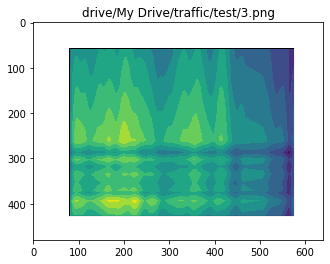

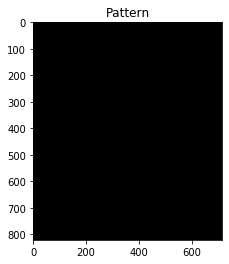

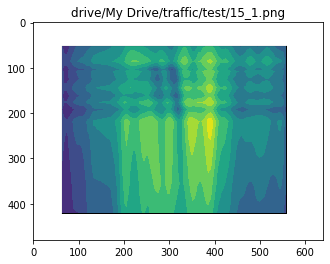

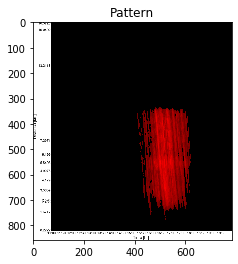

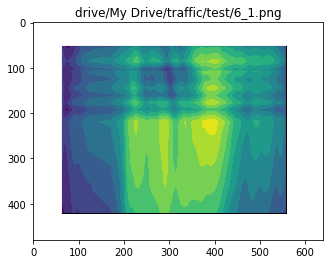

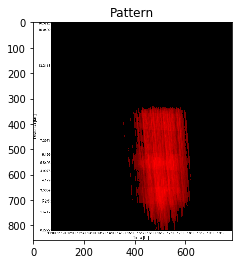

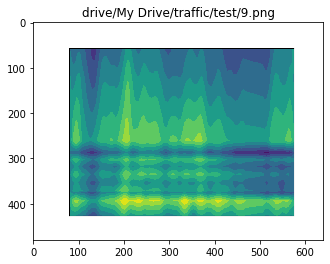

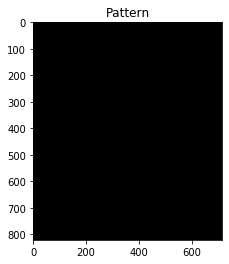

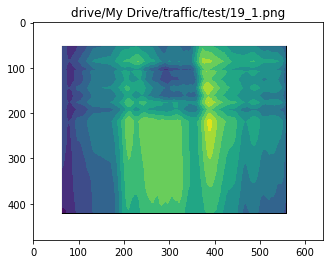

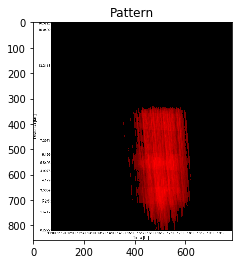

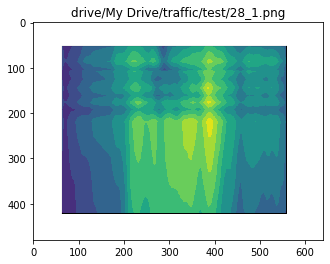

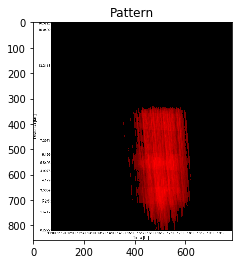

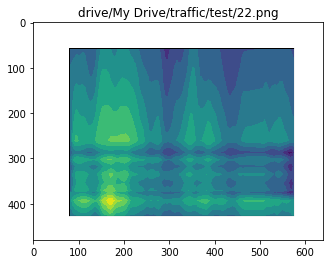

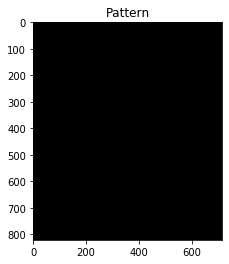

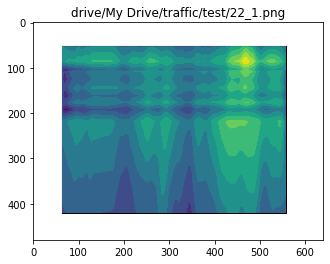

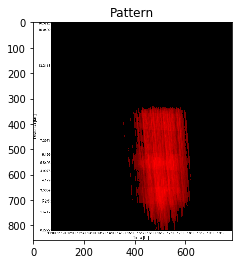

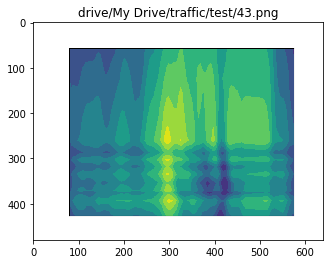

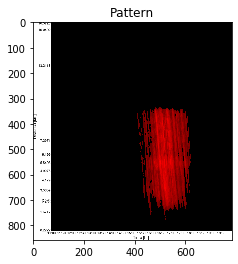

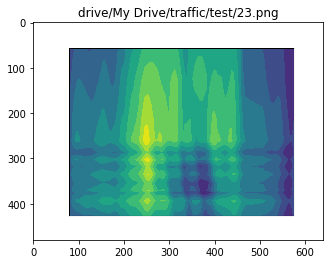

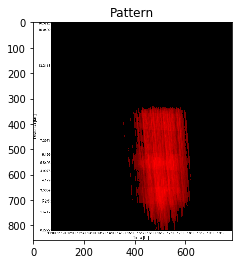

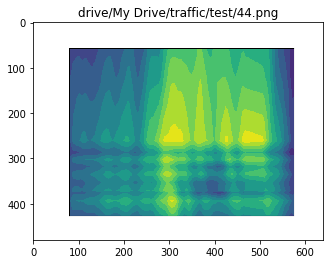

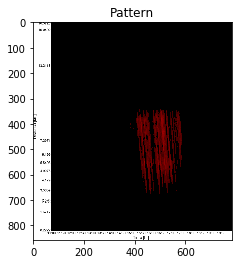

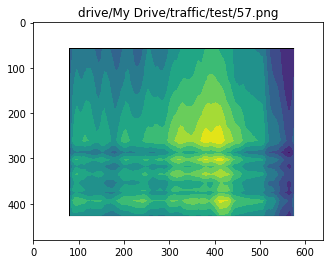

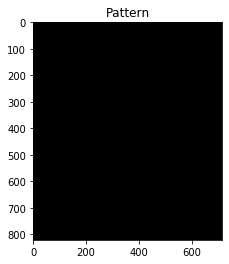

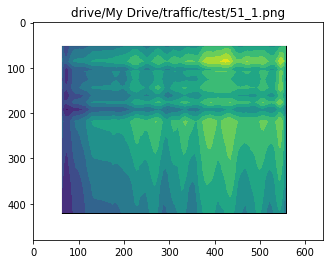

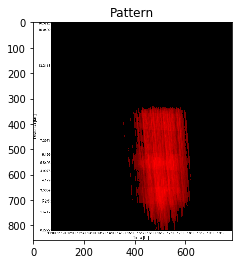

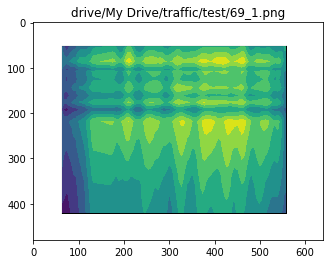

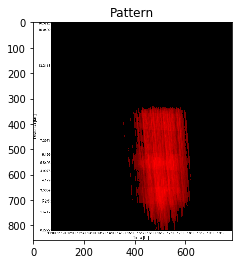

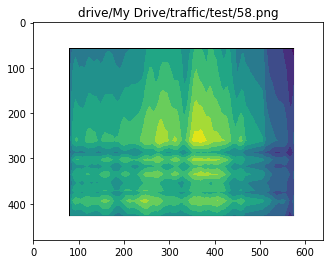

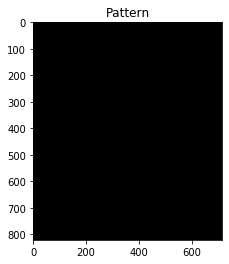

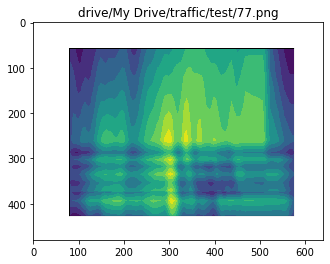

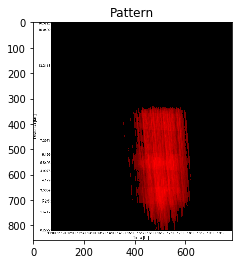

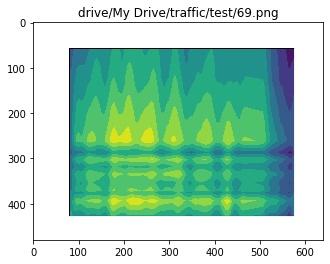

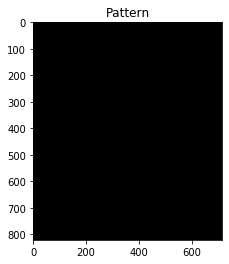

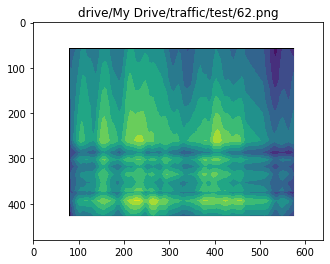

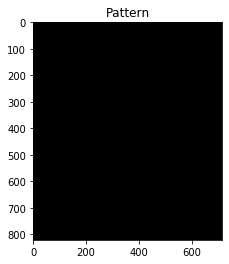

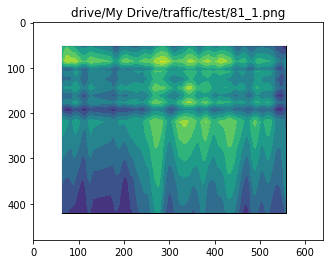

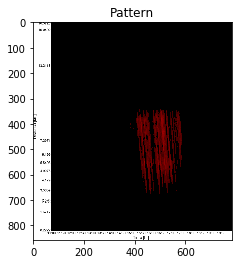

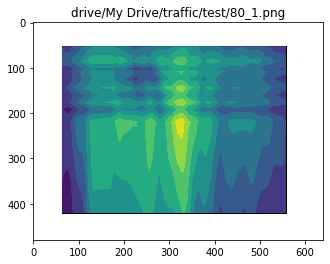

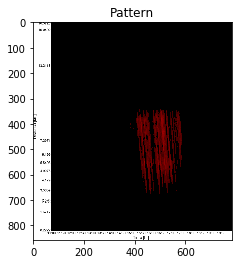

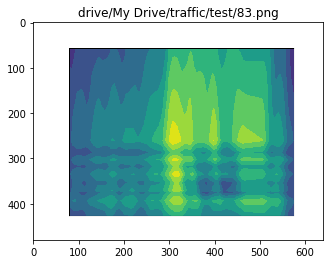

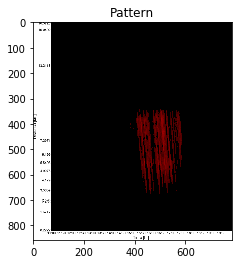

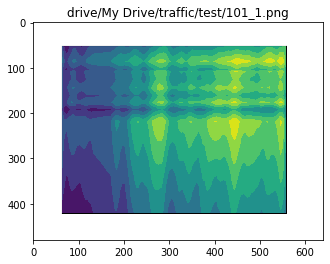

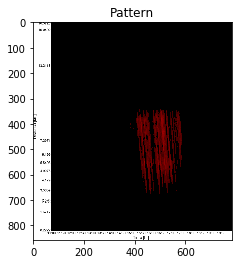

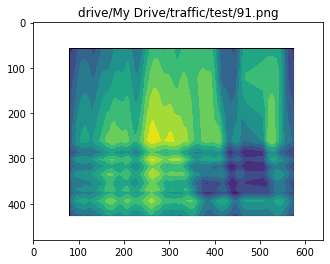

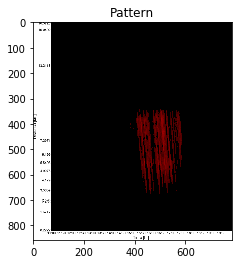

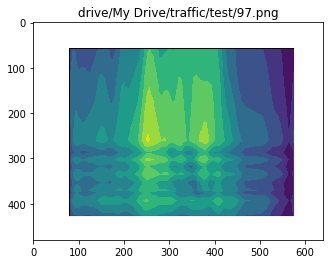

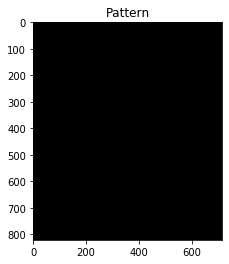

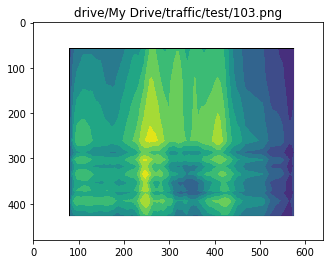

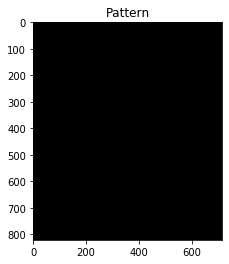

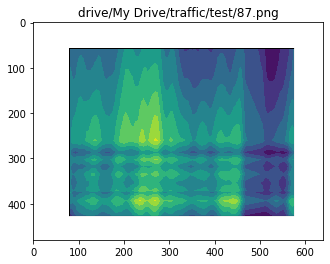

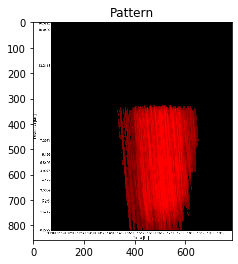

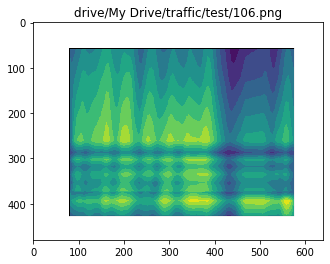

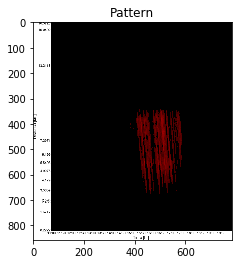

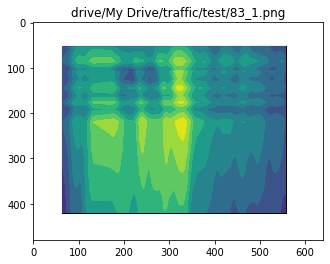

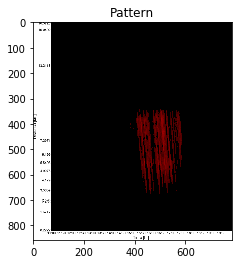

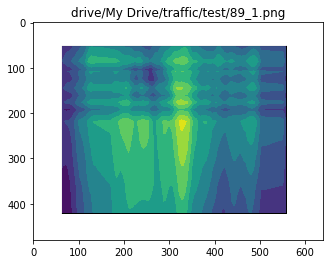

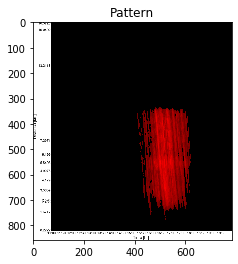

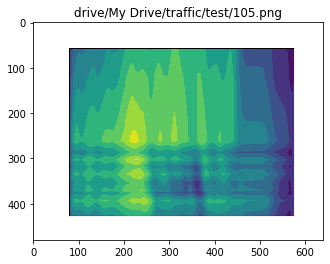

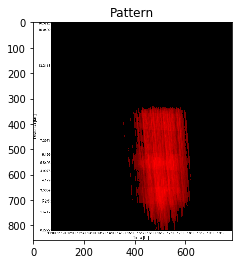

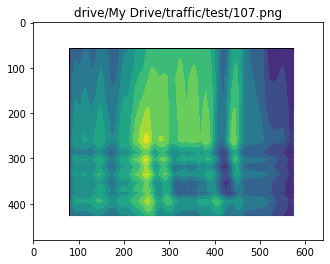

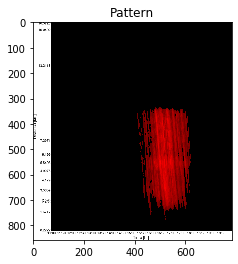

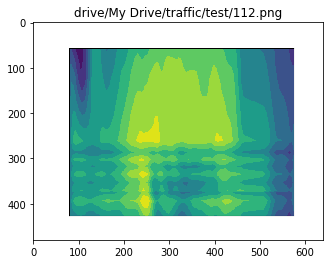

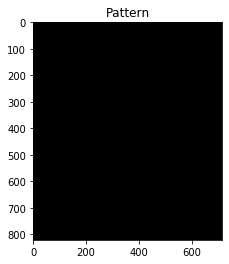

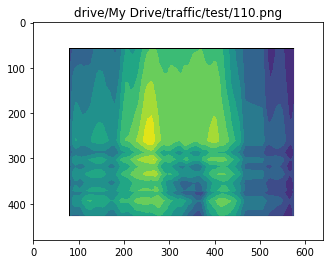

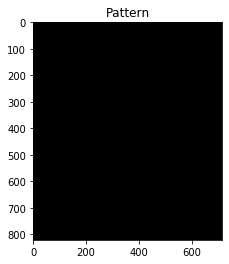

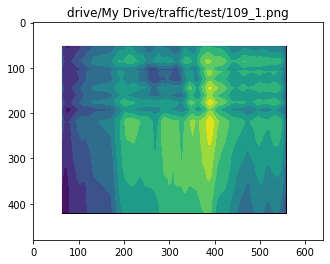

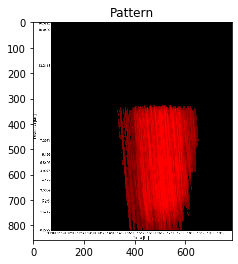

In [153]:
post_processing()

In [ ]:
post_processing(path_valid='drive/My Drive/traffic/train')